#### <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
# import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,15)
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Закомментируйте строку ниже для запуска локально
# from coin import coin, uniform_pdf, norm_pdf, expon_pdf


# Для запуска локально используйте:

import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

def uniform(size=1, precision=30):
    if not isinstance(size, tuple):
        size = (size,)
    coins = coin(np.prod(size) * precision).reshape(*size, precision)
    powers = (np.full(precision, 2.) ** np.arange(-precision, 0))
    return  np.sum(coins * powers, axis=-1)


def plot_uniform_density(size=200):
    # Get distribution
    x = uniform(size)
    _, ax = plt.subplots()

    # Scatter points
    ax.scatter(x=x, y=np.zeros(size), alpha=0.4, color='blue')

    # Plot hist
    ax.hist(x, density=True, bins=10, alpha=0.4)

    # Plot uniform pdf
    x = np.linspace(-0.25, 1.25, 500)
    ax.plot(x, uniform_pdf(x), 'r-', lw=5, alpha=0.4, label='Распределение')

    # Set title, legend and limits
    plt.suptitle('Генерация равномерного распределения с помощью монетками')
    ax.legend()
    ax.set_ylim(-0.1, 1.5)
    return plt.gcf()


def plot_uniform_different_precision(size=100):
    # определите график размера 15 на 3
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        ax = plt.subplot(3, 2, i + 1)
        ax.scatter(
          uniform(size, precision),
          np.zeros(size),
          alpha=0.4
        )

        plt.yticks([])
        plt.xticks(np.arange(0, 1.1, 0.25))
        plt.title('Равномерное распределение для точности: ' + str(precision))
    return plt.gcf()

# # It was first version of normal distribution generation
# # It is inefficient (twice as more coin flips)
# # IMHO much more elegant then other more optimal solution
# def box_muller(u1, u2, precision):
#     r = np.sqrt(-2 * np.log(u1))
#     phi = u2
#     return r * np.cos(2 * np.pi * phi)
#
#
# def normal(size=1, loc=0, scale=1, precision=30):
#     if not isinstance(size, tuple):
#         size = (size,)
#     uniform_var1 = (uniform(size, precision))
#     uniform_var2 = (uniform(size, precision))
#     return (lambda x, y: box_muller(x, y, precision))(uniform_var1, uniform_var2) * scale + loc


def normal(size=1, loc=0, scale=1, precision=30):
    # Set size as tuple
    if not isinstance(size, tuple):
        size = (size,)
    lin_size = np.prod(size)

    # Adjust length if it is odd
    is_odd = (lin_size % 2 == 1)
    if is_odd:
        lin_size += 1

    # Get uniform distributions
    coins = uniform(lin_size, precision) + 10 ** (-20)  # Added small shift to avoid zeros
    uniform_var1, uniform_var2 = np.split(coins, 2)

    # Box Muller converter
    r = np.sqrt(-2 * np.log(uniform_var1))
    phi = uniform_var2

    # Set flatten normal distriburion
    normal_distr = np.concatenate((r * np.cos(2 * np.pi * phi), r * np.sin(2 * np.pi * phi)))

    # Remove element if length is odd
    if is_odd:
        normal_distr = normal_distr[:-1]
    return normal_distr.reshape(size) * scale + loc



def plot_normal_density(size=200):
    # Get distribution
    x = normal(size)
    _, ax = plt.subplots()

    # Scatter points
    ax.scatter(x=x, y=np.zeros(size), alpha=0.4, color='blue')

    # Plot hist
    ax.hist(x, density=True, bins=10, alpha=0.4)

    # Plot normal pdf
    x = np.linspace(-3, 3, 500)
    ax.plot(x, norm_pdf(x), 'r-', lw=5, alpha=0.4, label='Распределение')

    # Set title, legend and limits
    plt.suptitle('Генерация нормального распределения с помощью монетками')
    ax.legend()
    return plt.gcf()


def expon(size=1, lambd=1, precision=30):
    uniform_var = (uniform(size, precision))
    return (lambda x: -1. / lambd * np.log(x))(uniform_var)


def plot_expon_density(size=100):
    # Get distribution
    x = expon(size, lambd=1)
    _, ax = plt.subplots()

    # Scatter points
    ax.scatter(x=x, y=np.zeros(size), alpha=0.4, color='blue')

    # Plot hist
    ax.hist(x, density=True, bins=10, alpha=0.4)

    # Plot expon pdf
    x = np.linspace(-0.5, 5, 500)
    ax.plot(x, expon_pdf(x), 'r-', lw=5, alpha=0.4, label='Распределение')

    # Set title, legend and limits
    plt.suptitle('Генерация экспоненциального распределения с помощью монетками')
    ax.legend()
    return plt.gcf()

In [4]:
for precision in range(9, 15):
    for _ in range(100):
        generated = normal(size=(10, 21, 11), precision=precision)

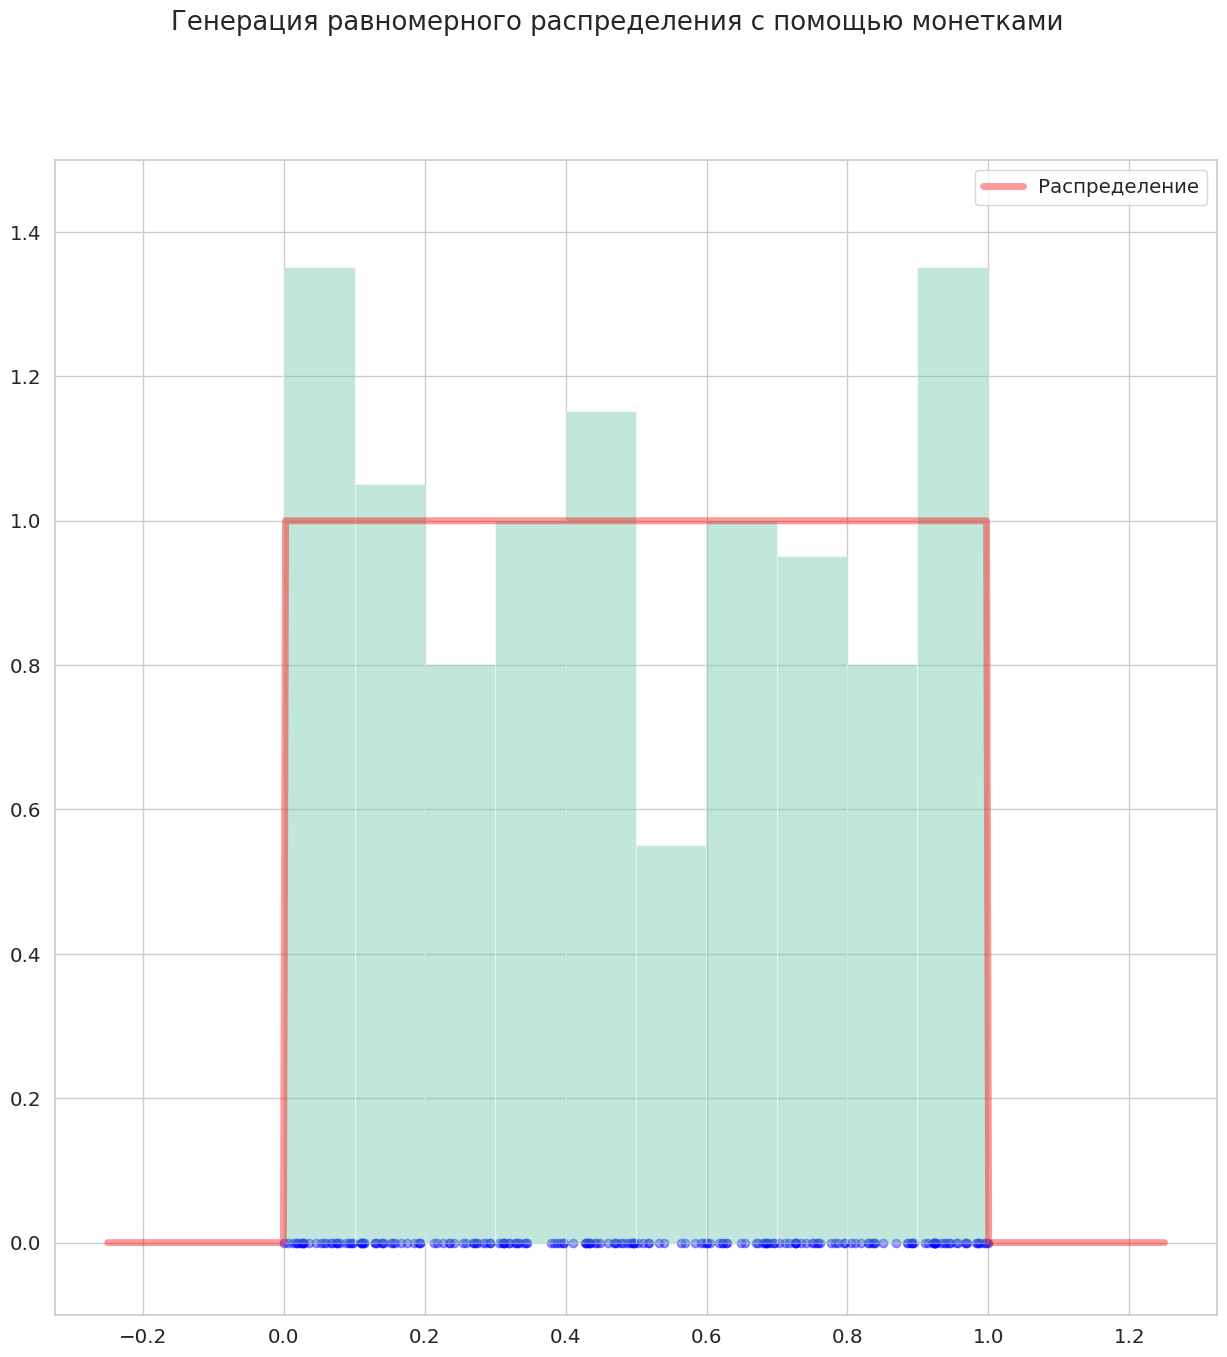

In [5]:
plot_uniform_density();

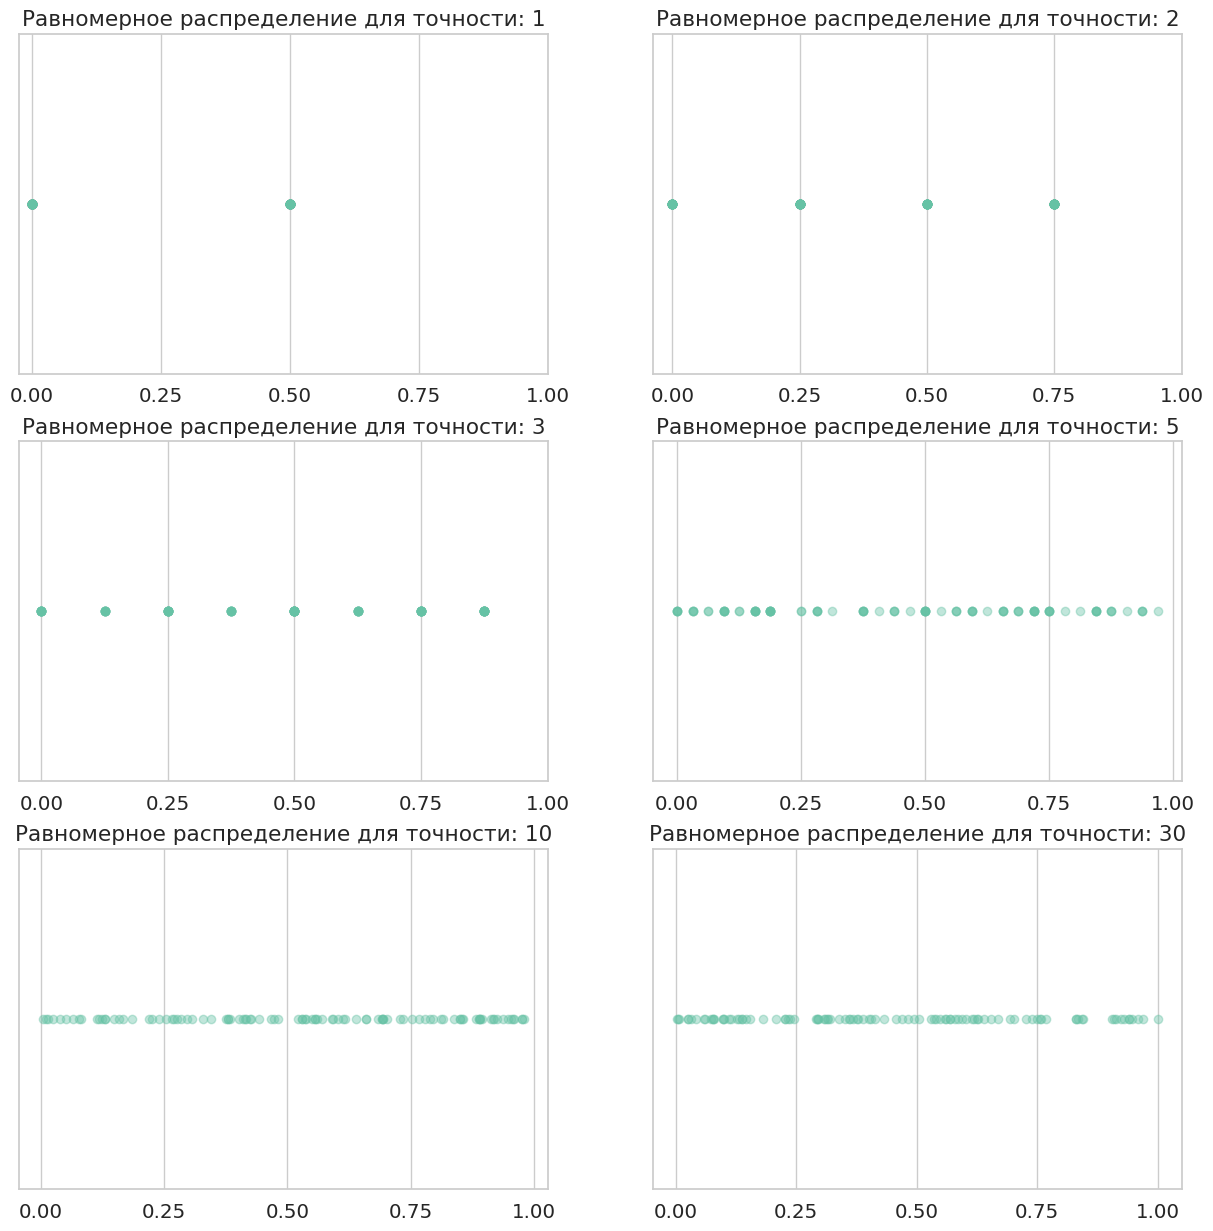

In [6]:
plot_uniform_different_precision();

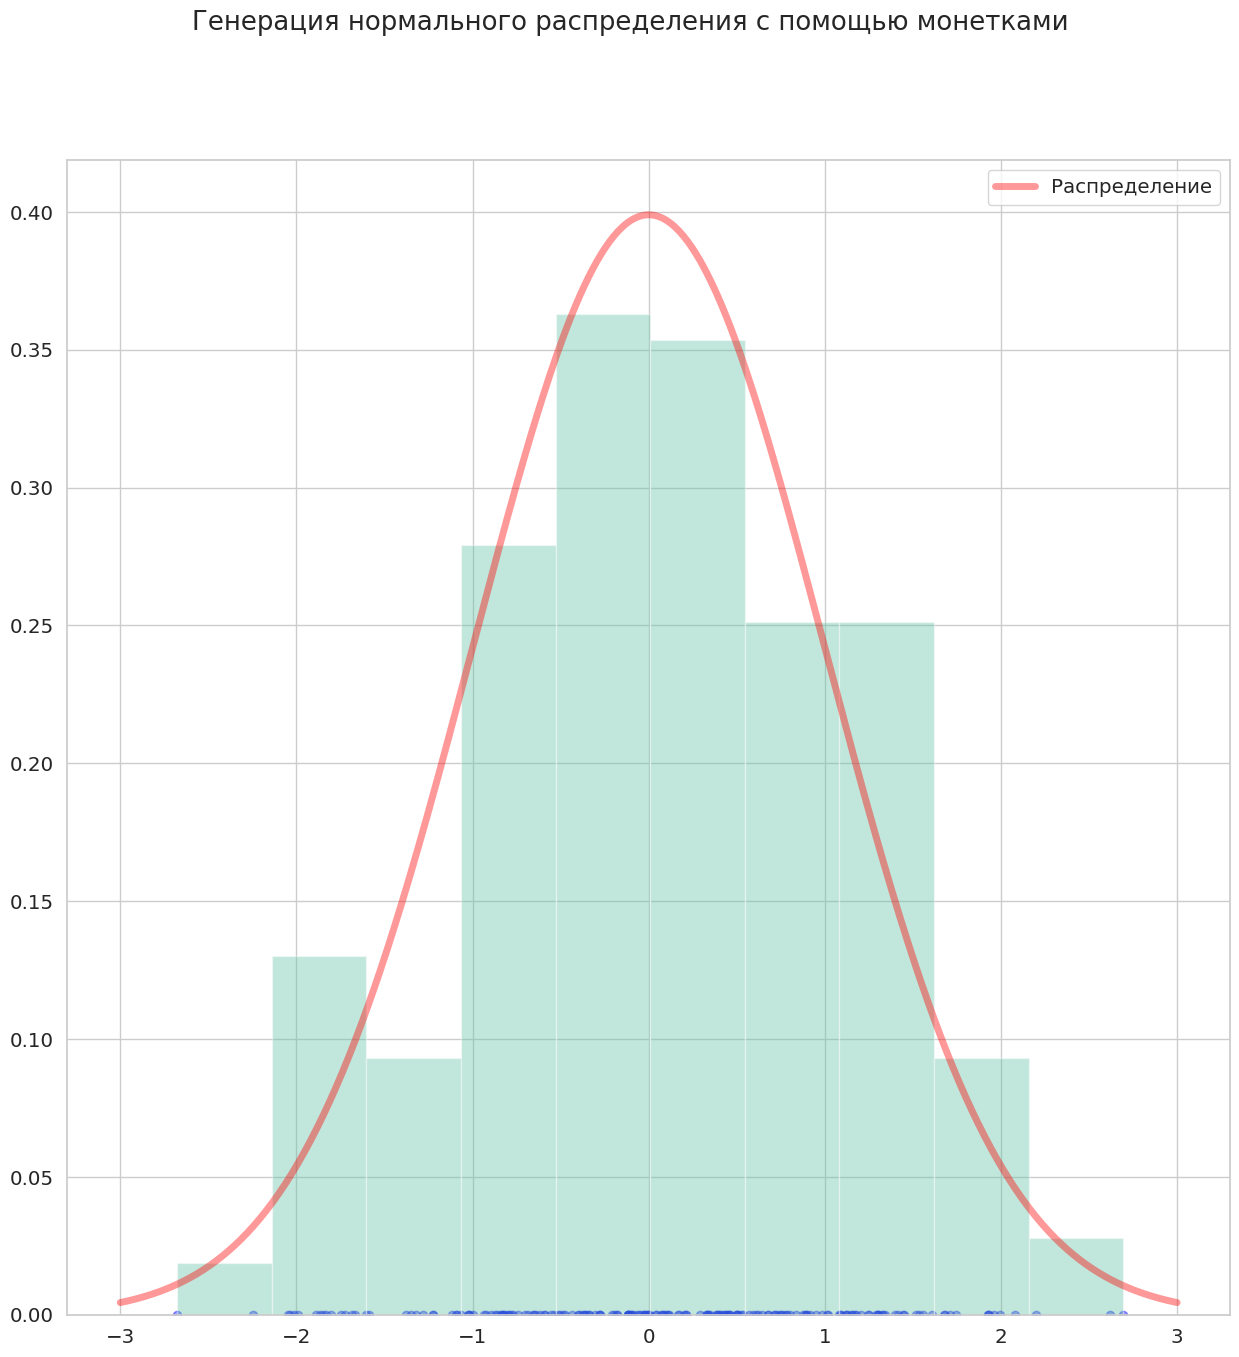

In [7]:
plot_normal_density();

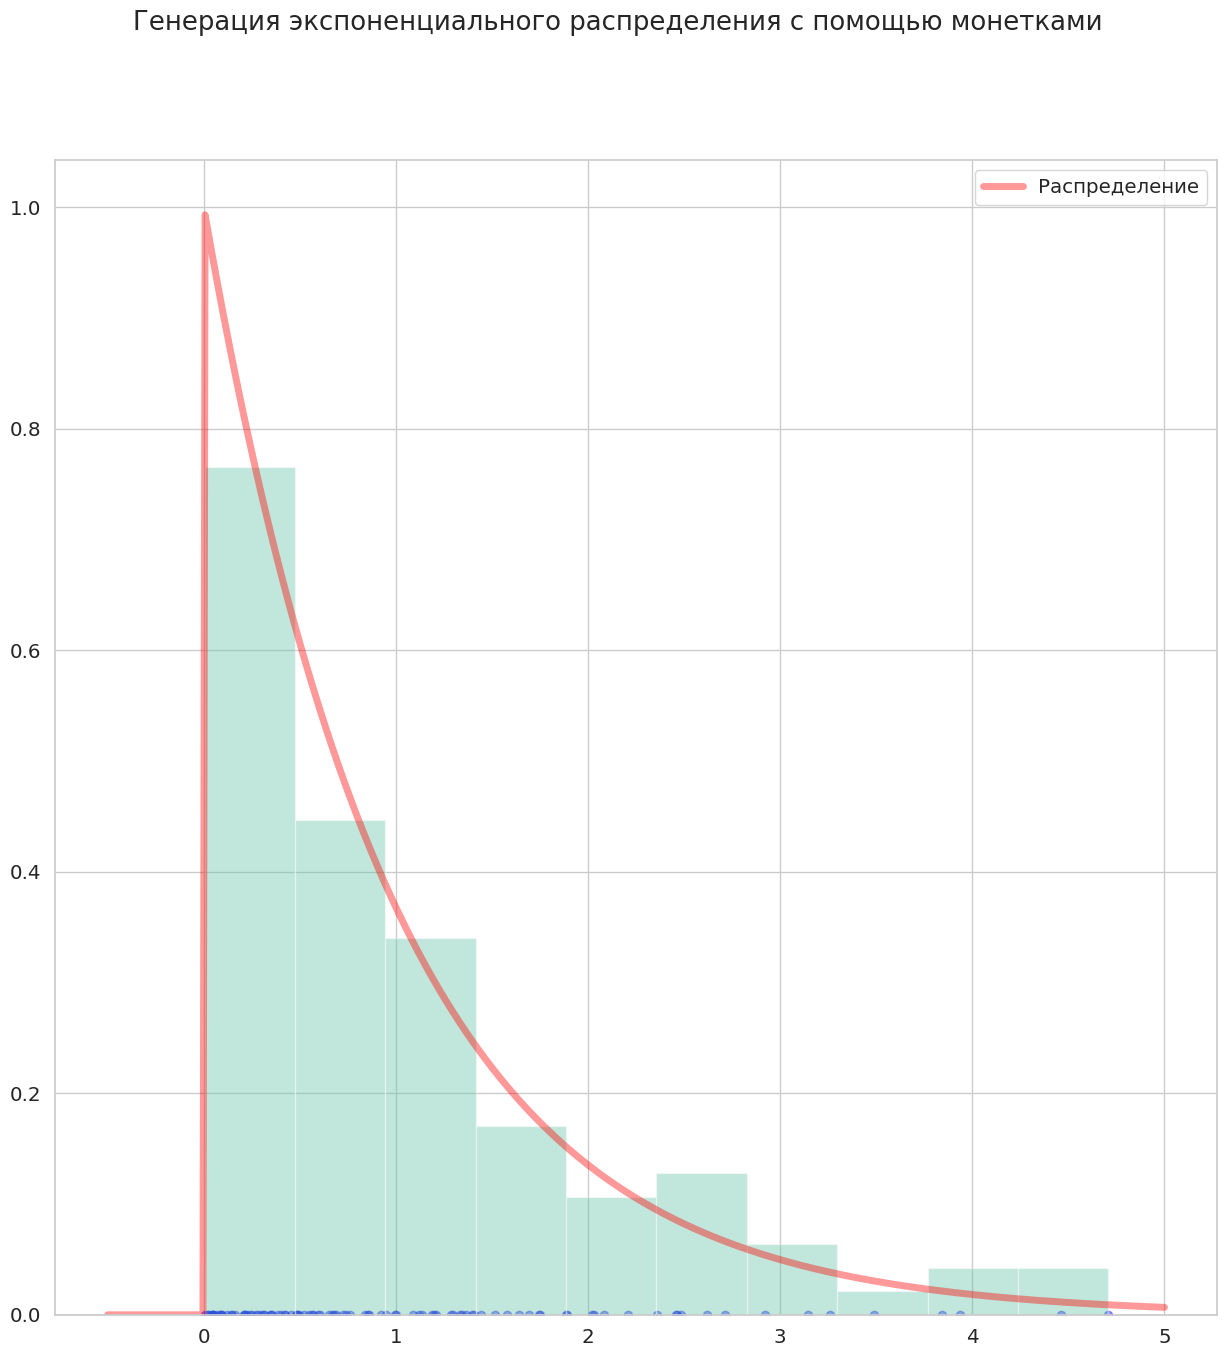

In [8]:
plot_expon_density();

### Выводы
1. В данной части работы были исследованы различные распределения случайных величин и способы их получения из равномерного. По итогам можно сказать, что простым подбрасыванием монетки можно сгенерировать практически любое распределение (по крайней мере те, что изучены в этой работе).
2. При этом необходимо следить за тем, чтобы величины сгенерированные по равномерному распределению с помощью монетки имели достаточно точности, чтобы покрыть потребности задачи, так как при малой точности распределение сгенерированной величины будет значительно отличаться от равномерного распределения.

графиках---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

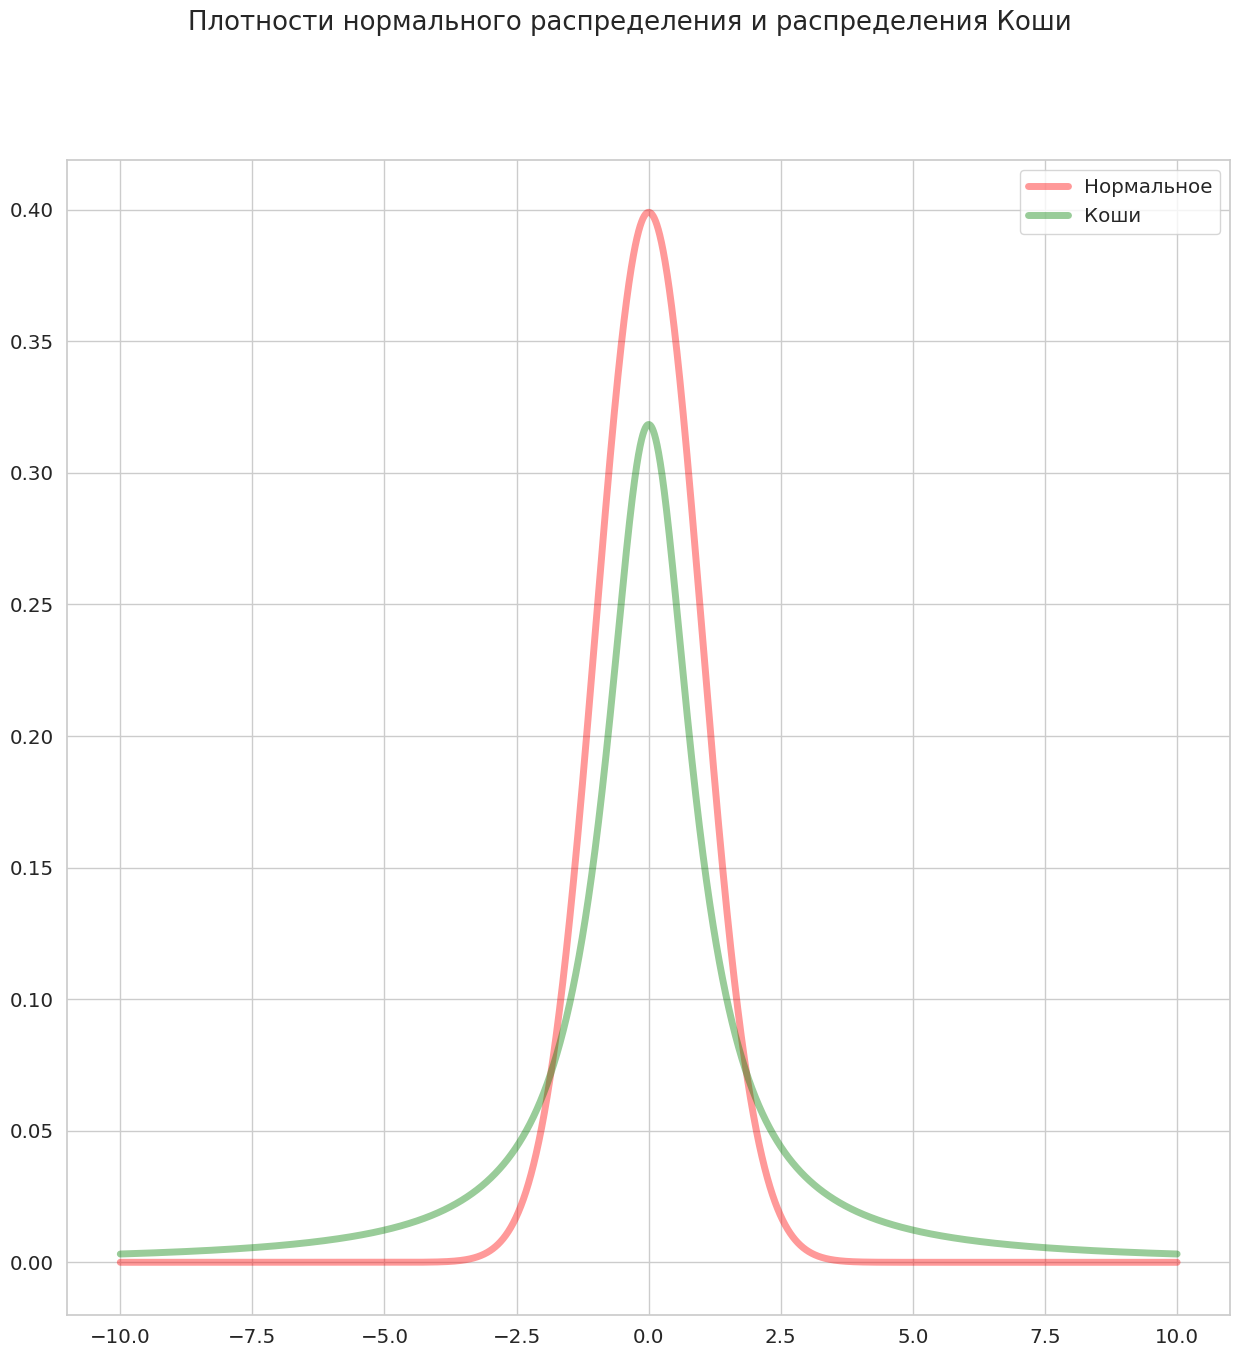

In [9]:
_, ax = plt.subplots()
# Plot normal, cauchy pdf
x = np.linspace(-10, 10, 5000)
ax.plot(x, sps.norm.pdf(x), 'r-', lw=5, alpha=0.4, label='Нормальное')
ax.plot(x, sps.cauchy.pdf(x), 'g-', lw=5, alpha=0.4, label='Коши')

# Set title, legend and limits
plt.suptitle('Плотности нормального распределения и распределения Коши')
ax.legend();

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

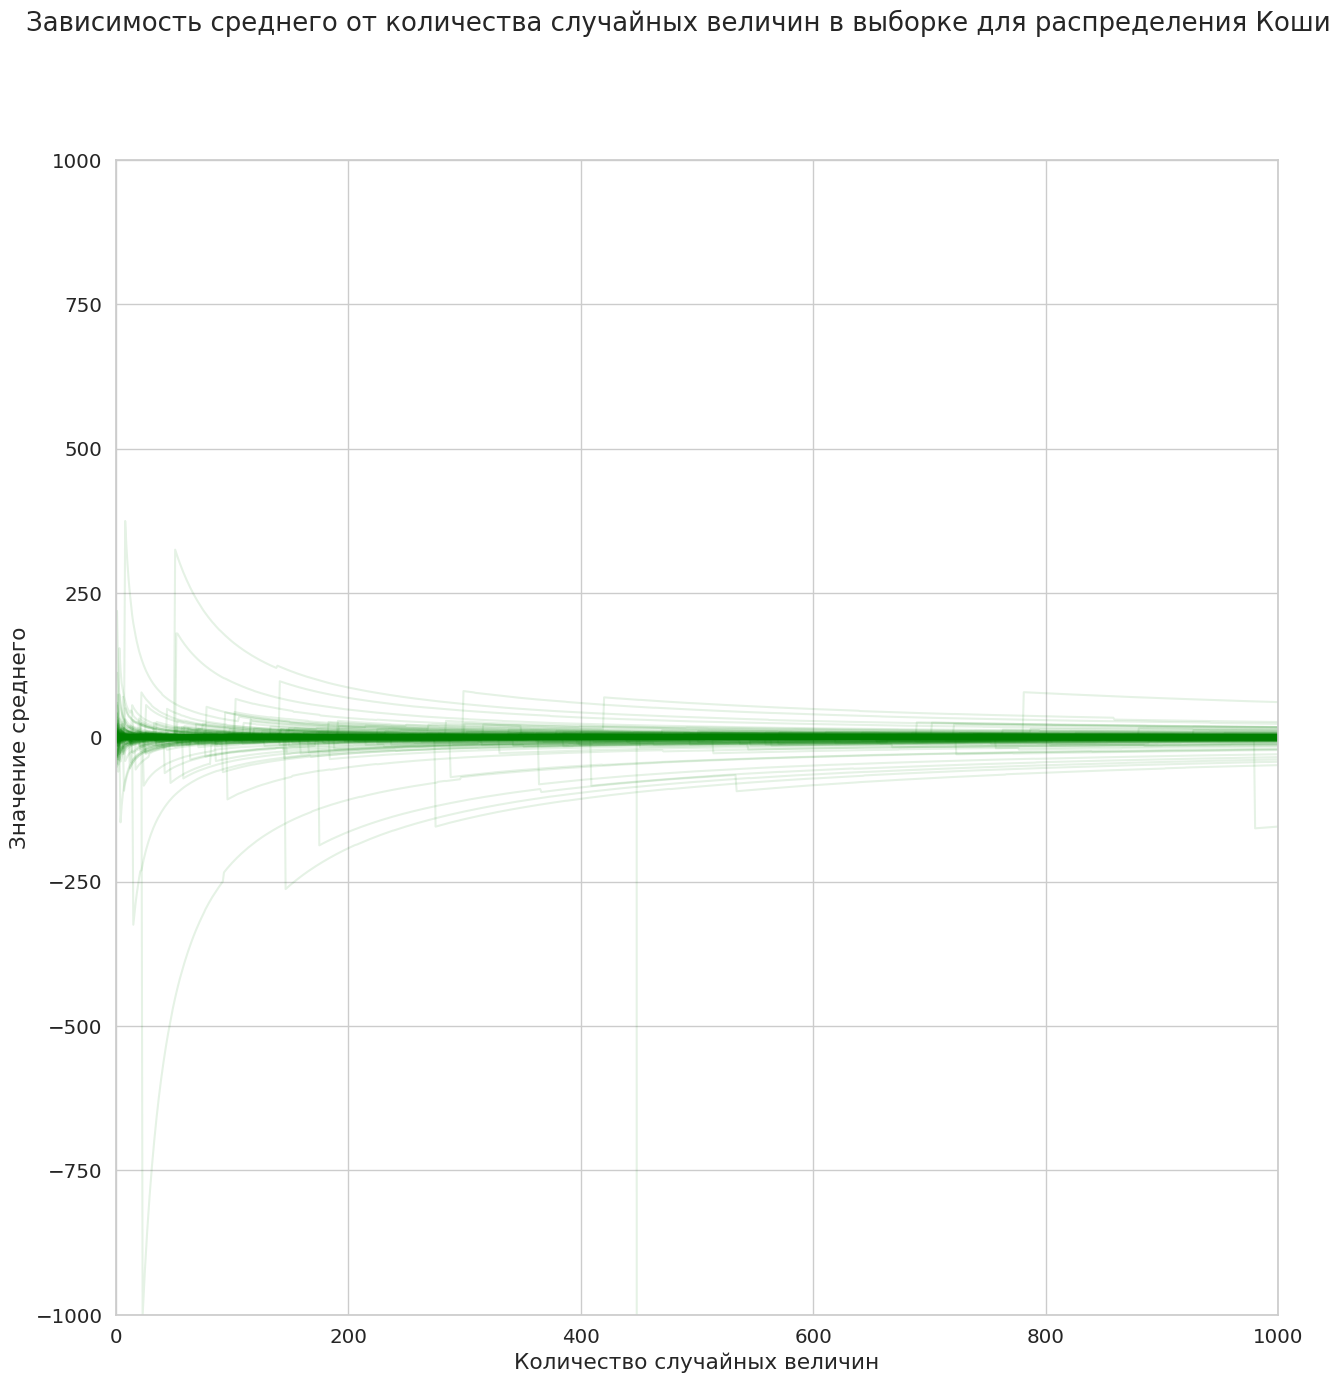

In [20]:
# Set size and amount of samples
size = 1000  # Size of sample
samples_count = 500  # Amount of samples

# Define samples
samples = sps.cauchy().rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

# Plot
_, ax = plt.subplots()

for i in range(samples_count):
    ax.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.1)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.ylim((-1000, 1000))
plt.suptitle('Зависимость среднего от количества случайных величин в выборке для распределения Коши');

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

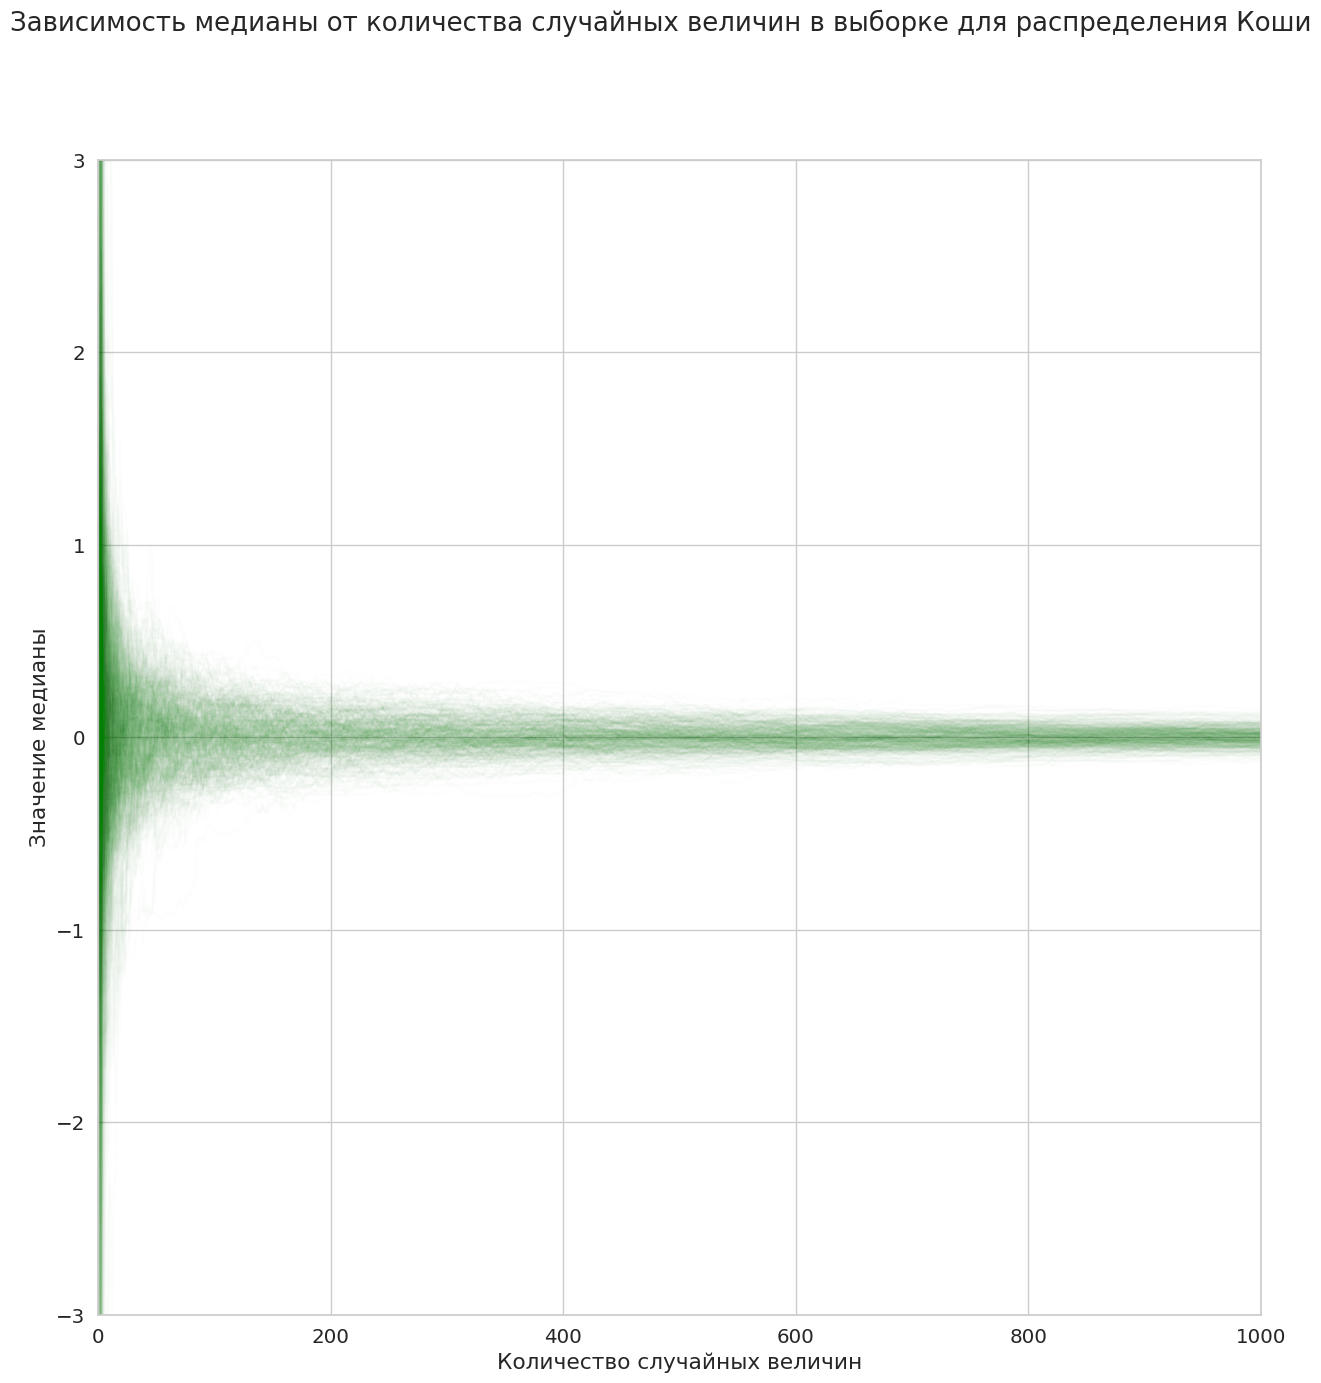

In [15]:
# Set size and amount of samples
size = 1000  # Size of sample
samples_count = 500  # Amount of samples

# Define samples
samples = sps.cauchy().rvs(size=(samples_count, size))
medians = [[np.median(sample[:i], axis=0) for i in range(1, size + 1)] for sample in samples]

# Plot
_, ax = plt.subplots()

for i in range(samples_count):
    ax.plot(np.arange(size) + 1, medians[i], color='green', alpha=0.01)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim((0, size))
plt.ylim((-3, 3))
plt.suptitle('Зависимость медианы от количества случайных величин в выборке для распределения Коши');

### Выводы
В данной части работы был исследован Закон Больших Чисел для распределения Коши. Построенные графики показывают, что для распределения Коши не выполняется ЗБЧ. В случае среднего значения можно найти такое среднее, которе отклоняется от 0 на достаточно большое значение, что не выполняется для медианы поскольку распределение Коши - симметрично относительно нуля.
Это экспериментально подтверждает тот факт, что при стремлении размера выборки к бесконечности среднее стремятся к мат ожиданию, которое не определено для распределения Коши.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

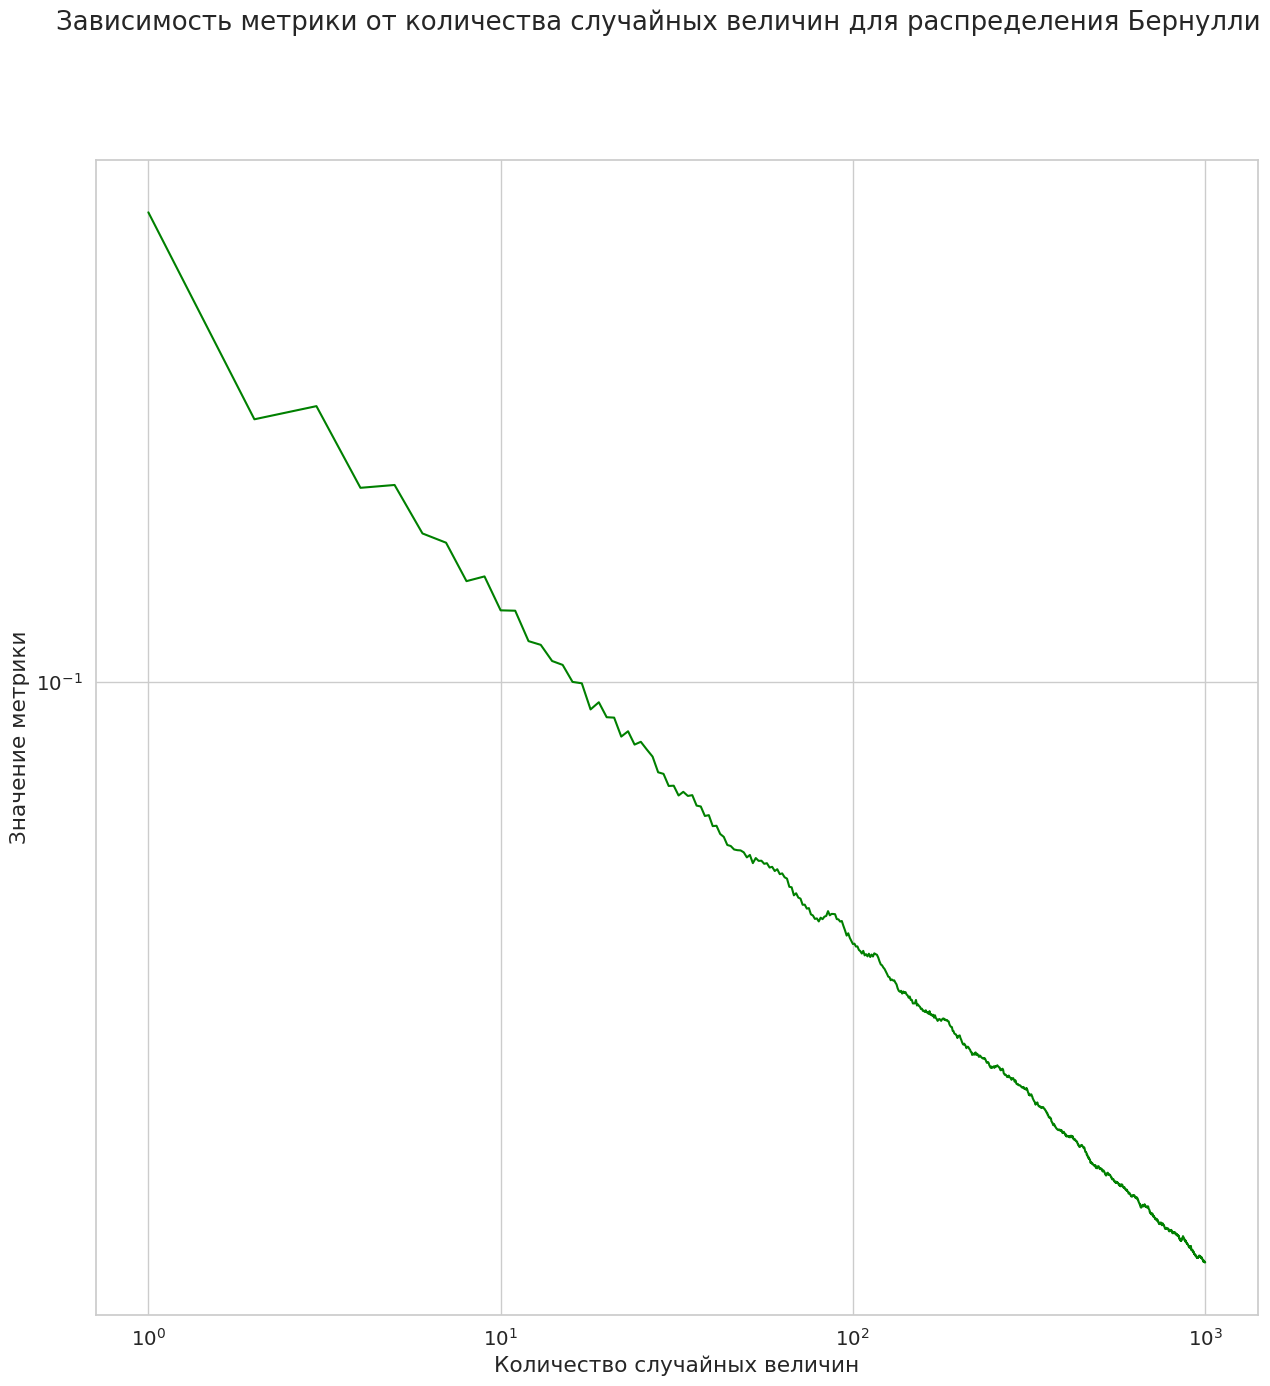

In [18]:
# Set alpha
alpha = 0.5

# Set threshold
threshold = 0.02

# Set sample size and amount of samples
size = 1000
samples_count = 500  # Amount of samples

# Get sample
samples = sps.bernoulli.rvs(alpha, size=(samples_count, size))
metrics = np.mean(abs((samples - alpha).cumsum(axis=1) / (np.arange(size) + 1)), axis=0)

# Plot
_, ax = plt.subplots()
ax.plot(np.arange(size) + 1, metrics, color='green', alpha=1)

# Set x and  y as log scale
ax.set_yscale('log')
ax.set_xscale('log')

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение метрики')
plt.suptitle('Зависимость метрики от количества случайных величин для распределения Бернулли');

In [13]:
print('При размере выборки {}, ожидается отклонение не более {}'.format(np.argmax(metrics < threshold), threshold))

При размере выборки 363, ожидается отклонение не более 0.02


**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

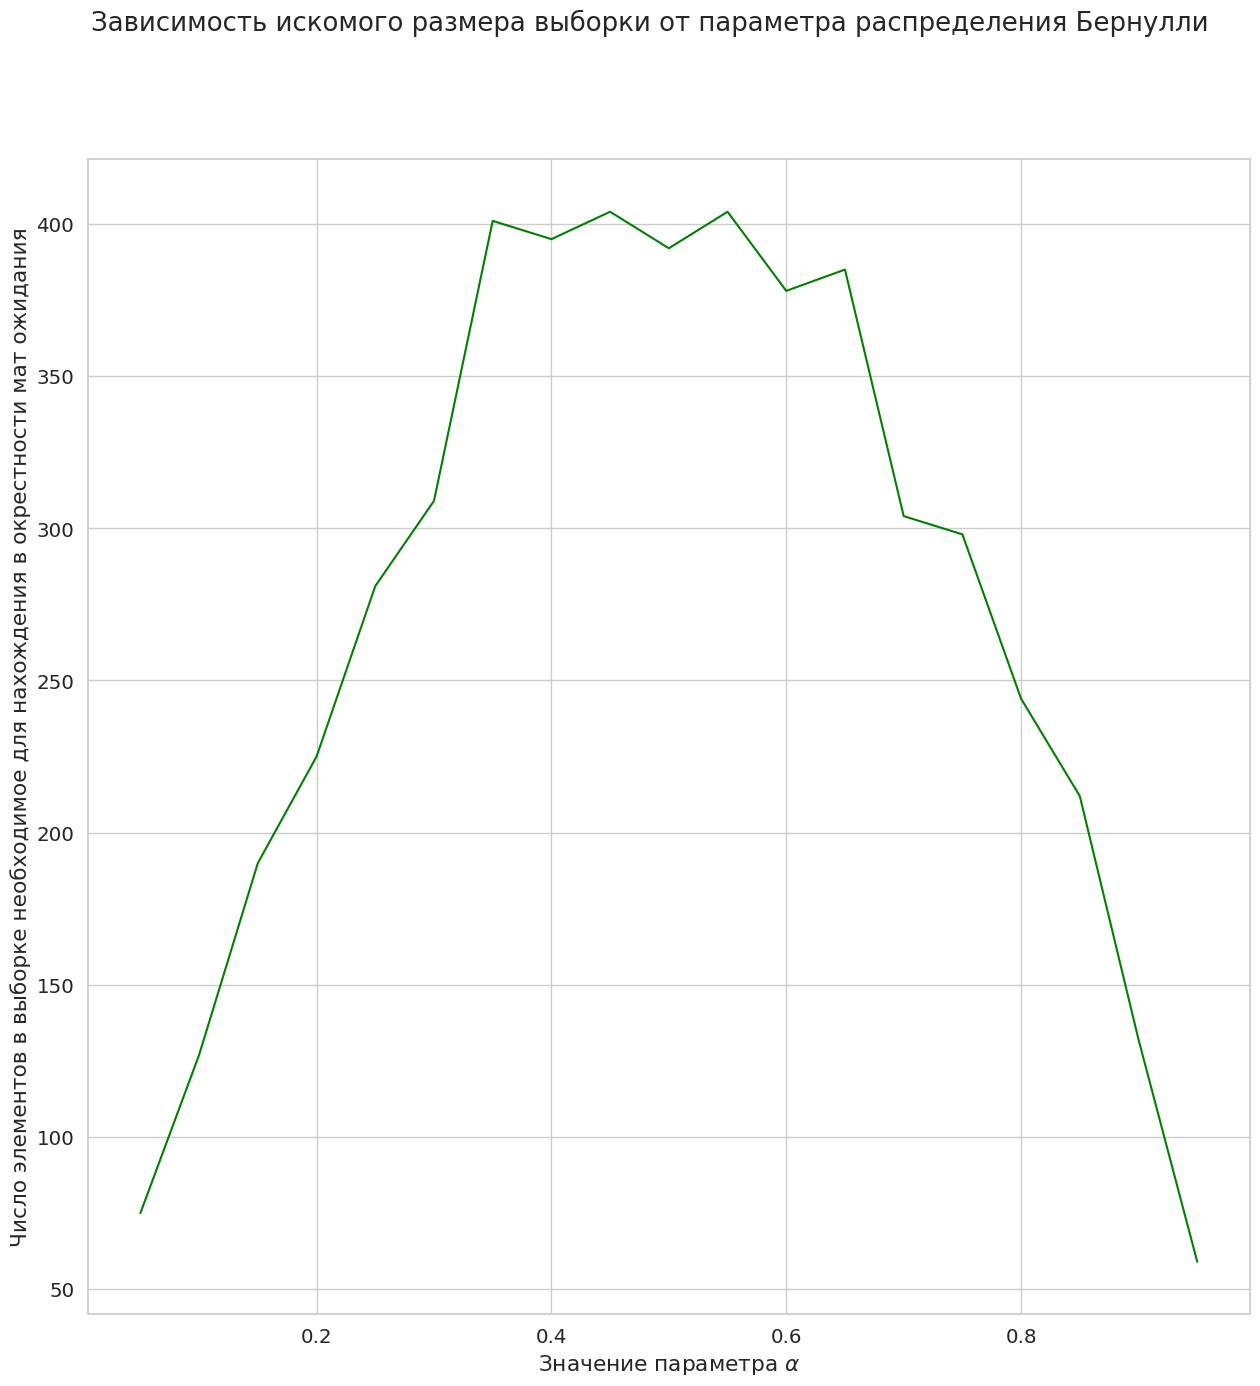

In [14]:
# Set threshold
threshold = 0.02

# Set sample size and amount of samples
size = 1000
samples_count = 500  # Amount of samples

# Set alpha values
alphas = np.arange(0.05, 0.96, 0.05)

result = np.zeros(alphas.size)
for i, alpha in enumerate(alphas):
    # Get sample
    samples = sps.bernoulli.rvs(alpha, size=(samples_count, size))
    metrics = np.mean(abs((samples - alpha).cumsum(axis=1) / (np.arange(size) + 1)), axis=0)
    result[i] = np.argmax(metrics < threshold)


# Plot
_, ax = plt.subplots()
ax.plot(alphas, result, color='green', alpha=1)

plt.xlabel(r'Значение параметра $\alpha$')
plt.ylabel('Число элементов в выборке необходимое для нахождения в окрестности мат ожидания')
plt.suptitle('Зависимость искомого размера выборки от параметра распределения Бернулли');

### Выводы
В последней части работы был исследован Закон Больших Чисел с точки зрения скорости сходимости для распределения Бернулли.
1. Исследуя зависимость отклонения среднего сгенерированных случайных величин от их мат ожидания был построен график. Благодаря логарифмической шкале видно, что искомая зависимость имеет следующий характер: $y \sim x^{-\frac{1}{2}}$. Для точности в 0.02 достаточно 385 значений.
2. Исследуя число необходимых значений в зависимости от параметра $p$ распределения Бернулли было обнаружено, что функция достигает своего максимума в районе точки 0.5 и уменьшается к концам отрезка. Это подтверждает интуитивное предположение о том, что если на монетке чаще выпадает 1, то потребуется меньше бросков, чтобы приблизиться к мат ожданию.